## Hospital medical charges

Sample of hospital charge investigation using Kaggle data. Questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('data/insurance2.csv')

In [4]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ Mean is 13270.42, SD is 12105.48. These data are clearly right skewed and possibly bimodal, so mean and sd seem inappropriate. At the least, use a median and perhaps find a good splitting variable.

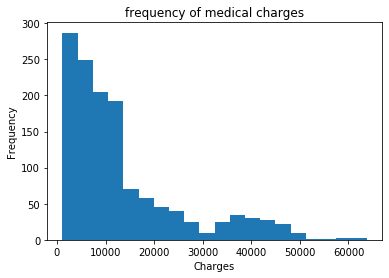

In [5]:
_ = plt.hist(medical['charges'], bins=20)
_ = plt.xlabel('Charges')
_ = plt.ylabel('Frequency')
_ = plt.title('frequency of medical charges')
plt.show()

In [6]:
m = np.mean(medical['charges'])
s = np.std(medical['charges'])
print('Mean is $' + '{:.2f}'.format(m) + ', SD is ' +'{:.2f}'.format(s))

Mean is $13270.42, SD is 12105.48


__Q:__ The administrator is concerned that the actual average charge has fallen below 12000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ If this is a random sample, it is large enough (n > 1300) that the sampling distribution will be normally distributed. We can then do a Z-test, checking whether these data could plausibly come from a population with mean of 12,000.

__Q:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A one-sided or two-sided interval? Calculate the critical value and the relevant 95% confidence interval for the mean and comment on whether the administrator should be concerned?

__A:__ One-sided because they are concerned about costs dipping, not costs increasing.
Our test reveals that a CI would stop at \\$11456, and our mean is \\$13270, indicating that costs have not decreased below the required thresholdHowever, if the median matters, then we are well below that level (median \\$9382, but sampling distributions of median are hard to calculate).

In [13]:
pop_mean = 12000

In [14]:
# To calculate 95% CI, first find the parameters of the sampling distribution (mean is the population)
s_of_samplingdist = s/np.sqrt(len(medical))
# Critical value is -1.645, standard Z-test
#Now find the lower limit (given one-sided CI)
CI = [pop_mean-1.645*s_of_samplingdist]
print(CI)
np.median(medical['charges'])

[11455.597590624491]


9382.033

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means where the pooled standard deviation of the two groups is given by
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t* test statistic is then given by

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

What assumption about the variances of the two groups are we making here?

__A:__ Looking at the sp formula above, we assume that it makes sense for the variances to be averaged (ie that the variances are roughly equal)

__Q:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__  On average, the insured were charged \\$16424 and the uninsured were charged \\$8821. This difference was statistically significant, t = 11.89, p = 0.000000. Both versions returned the same result.

In [44]:
# Calculate the little values first
s_ins = np.std(medical[medical['insuranceclaim'] ==1]['charges'])
s_unins = np.std(medical[medical['insuranceclaim'] ==0]['charges'])
n_ins = sum(medical['insuranceclaim'] ==1)
n_unins = sum(medical['insuranceclaim'] ==0)
m_ins = np.mean(medical[medical['insuranceclaim'] ==0]['charges'])
m_unins = np.mean(medical[medical['insuranceclaim'] ==1]['charges'])
# Now do the pooled standard deviation
pooled_s = np.sqrt( ((n_ins-1)*s_ins**2 + (n_unins-1)*s_unins**2 )/ (n_ins + n_unins -2))
# THen the t-stat
t_stat = (m_ins - m_unins) / (pooled_s * np.sqrt(1/n_ins + 1/n_unins))
print(t_stat)
# Look up the p-value with the t function
t.cdf(t_stat, m_ins+m_unins-2)

-11.901306943555385


7.120403511503807e-33

In [45]:
from scipy.stats import ttest_ind
insured = medical['insuranceclaim'] == 1
uninsured = medical['insuranceclaim'] == 0
test = ttest_ind(medical[insured]['charges'], medical[uninsured]['charges'])

insured_descrips = [np.mean(medical[insured]['charges']), np.std(medical[insured]['charges'])]
uninsured_descrips = [np.mean(medical[uninsured]['charges']), np.std(medical[uninsured]['charges'])]

print('On average, the insured were charged $' +'{:.0f}'.format(insured_descrips[0]) + 
      ' and the uninsured were charged $' + '{:.0f}'.format(uninsured_descrips[0]) +
      '. This difference was statistically significant, t=' + 
      '{:.2f}'.format(test[0]) + ', p=' +'{:3f}'.format(test[1]))

On average, the insured were charged $16424 and the uninsured were charged $8821. This difference was statistically significant, t=11.89, p=0.000000


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do pass your data to it.

__Q:__ In the above calculations, we assumed the sample variances were equal. We may well suspect they are not (we'll explore this in another assignment). The calculation becomes a little more complicated to do by hand in this case, but we now know of a helpful function. Check the documentation for the function to tell it not to assume equal variances and perform the test again.

__A:__ You can select the keyword equal_var to perform Welch's t-test instead (mind you, you'd need to do Levene's test of variance equality first)

__Q:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ There's normaltest which accepts an array and performs the Z-test.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test